In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel('de.xlsx')
data.head(10)

,Наименование вклада (Продукт),Валюта,Дата открытия вклада,Дата окончания вклада,"Сумма вклада в рублях, тыс.руб",Сумма вклада в рублях,Ставка,Количество дней
0,"СКБ ""Выгодный 31 - 90 дней""",RUR,2017-01-01,2017-03-04,10.000001,1000000.1,0.093,62
1,"СКБ ""Выгодный 31 - 90 дней""",RUR,2017-01-01,2017-03-06,1.000001,100000.1,0.093,64
2,"СКБ ""Выгодный 91 - 180 дней""",RUR,2017-01-01,2017-04-02,18.160000,1816000.0,0.095,91
3,"СКБ ""Выгодный 91 - 180 дней""",RUR,2017-01-01,2017-04-03,0.500000,50000.0,0.095,92
4,"СКБ ""Выгодный 91 - 180 дней""",RUR,2017-01-01,2017-04-04,1.500000,150000.0,0.095,93
5,"СКБ ""Выгодный 91 - 180 дней""",RUR,2017-01-01,2017-04-06,0.600000,60000.0,0.095,95
6,"СКБ ""Выгодный 91 - 180 дней""",RUR,2017-01-01,2017-05-01,0.400000,40000.0,0.095,120
7,"СКБ ""Выгодный 91 - 180 дней""",RUR,2017-01-01,2017-05-02,0.600001,60000.1,0.095,121
8,"СКБ ""Выгодный 91 - 180 дней""",RUR,2017-01-01,2017-06-30,1.700001,170000.1,0.095,180
9,"СКБ ""Выгодный 91 - 180 дней""",RUR,2017-01-01,2017-07-02,3.000000,300000.0,0.095,182


In [3]:
data = data.drop('Сумма вклада в рублях', axis=1)

In [4]:
data['Дата открытия вклада'] = pd.to_datetime(data['Дата открытия вклада'], format = '%Y-%m-%d')


In [5]:
data['Дата окончания вклада'] = pd.to_datetime(data['Дата окончания вклада'], format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72420 entries, 0 to 72419
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Наименование вклада (Продукт)   72420 non-null  object        
 1   Валюта                          72420 non-null  object        
 2   Дата открытия вклада            72420 non-null  datetime64[ns]
 3   Дата окончания вклада           72420 non-null  datetime64[ns]
 4   Сумма вклада в рублях, тыс.руб  72420 non-null  float64       
 5   Ставка                          72318 non-null  float64       
 6   Количество дней                 72420 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 3.9+ MB


Есть пропуски в столбце Ставка. 

In [6]:
data.isna().sum()

Наименование вклада (Продукт)       0
Валюта                              0
Дата открытия вклада                0
Дата окончания вклада               0
Сумма вклада в рублях, тыс.руб      0
Ставка                            102
Количество дней                     0
dtype: int64

In [7]:
data['Ставка'] = data['Ставка'].fillna(data['Ставка'].median())

### Средние значения по вкладам

Составим таблицу со средними показателями и отсортируем по самому прибыльному вкладу

In [8]:
s = data.groupby('Наименование вклада (Продукт)').mean()
s = s.sort_values('Сумма вклада в рублях, тыс.руб', ascending=False)
s

,"Сумма вклада в рублях, тыс.руб",Ставка,Количество дней
Наименование вклада (Продукт),,,
"СКБ ""Выгодный 31 - 90 дней USD""",554.028585,0.016000,177.000000
"СКБ ""Выгодный 91 - 180 дней USD""",129.818399,0.017000,264.711479
"СКБ ""Выгодный 180 дней +тариф""",119.298579,0.087683,201.793031
"СКБ ""Выгодный 365 дней + тариф""",88.910183,0.086285,324.246988
"СКБ ""Выгодный 271 - 365 дней""",80.566304,0.086362,278.810738
"СКБ ""Выгодный 91 день + тариф""",75.193257,0.087207,184.060953
"СКБ ""Выгодный 91 - 180 дней""",68.637589,0.088168,264.635187
"СКБ ""Выгодный 3/6/9/12/15/18/21/24/27/30/33/36 мес."" 1095",64.202590,0.082477,168.871314
"СКБ ""Выгодный 6/12/18/24/30/36 мес."" 1095",53.244012,0.082472,284.763975


- **Лидеры по средним значениям:**

In [9]:
s.head(10)

,"Сумма вклада в рублях, тыс.руб",Ставка,Количество дней
Наименование вклада (Продукт),,,
"СКБ ""Выгодный 31 - 90 дней USD""",554.028585,0.016000,177.000000
"СКБ ""Выгодный 91 - 180 дней USD""",129.818399,0.017000,264.711479
"СКБ ""Выгодный 180 дней +тариф""",119.298579,0.087683,201.793031
"СКБ ""Выгодный 365 дней + тариф""",88.910183,0.086285,324.246988
"СКБ ""Выгодный 271 - 365 дней""",80.566304,0.086362,278.810738
"СКБ ""Выгодный 91 день + тариф""",75.193257,0.087207,184.060953
"СКБ ""Выгодный 91 - 180 дней""",68.637589,0.088168,264.635187
"СКБ ""Выгодный 3/6/9/12/15/18/21/24/27/30/33/36 мес."" 1095",64.202590,0.082477,168.871314
"СКБ ""Выгодный 6/12/18/24/30/36 мес."" 1095",53.244012,0.082472,284.763975


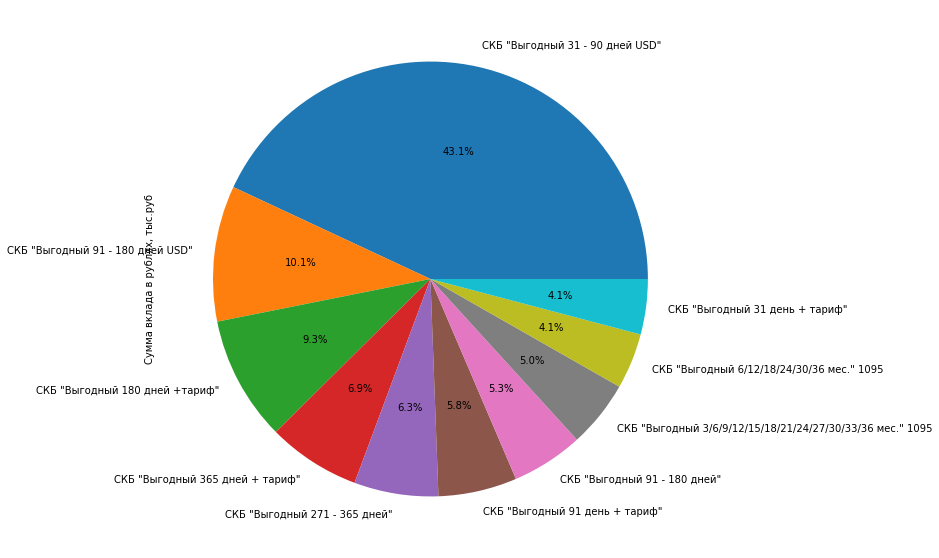

In [10]:
plt.rcParams['figure.figsize'] = [10, 10] 
s.head(10).plot(y='Сумма вклада в рублях, тыс.руб', kind='pie', autopct='%1.1f%%', legend=False)
plt.show()

### Сумма по вкладам

Создадим таблицу с лидерами по общей суммой, привлеченной по вкладам

In [11]:
df = data[['Наименование вклада (Продукт)', 'Сумма вклада в рублях, тыс.руб']]
df = df.groupby('Наименование вклада (Продукт)').sum()
df = df.sort_values('Сумма вклада в рублях, тыс.руб', ascending=False)
df = df.head(10)
df

,"Сумма вклада в рублях, тыс.руб"
Наименование вклада (Продукт),
"СКБ ""Выгодный 91 - 180 дней""",853988.882847
"СКБ ""Выгодный 31 - 90 дней""",576202.371179
"СКБ ""Выгодный 91 - 180 дней USD""",541732.180718
"СКБ ""Выгодный 31 день + тариф""",217705.534274
"СКБ ""Выгодный 180 дней +тариф""",171193.460802
"СКБ ""Выгодный 91 день + тариф""",164071.685811
"СКБ ""Выгодный - Классика 91 - 180 дней""",139692.262118
"СКБ ""Выгодный - Классика 31 - 90 дней""",133906.048756
"СКБ ""Выгодный 271 - 365 дней""",120043.793084


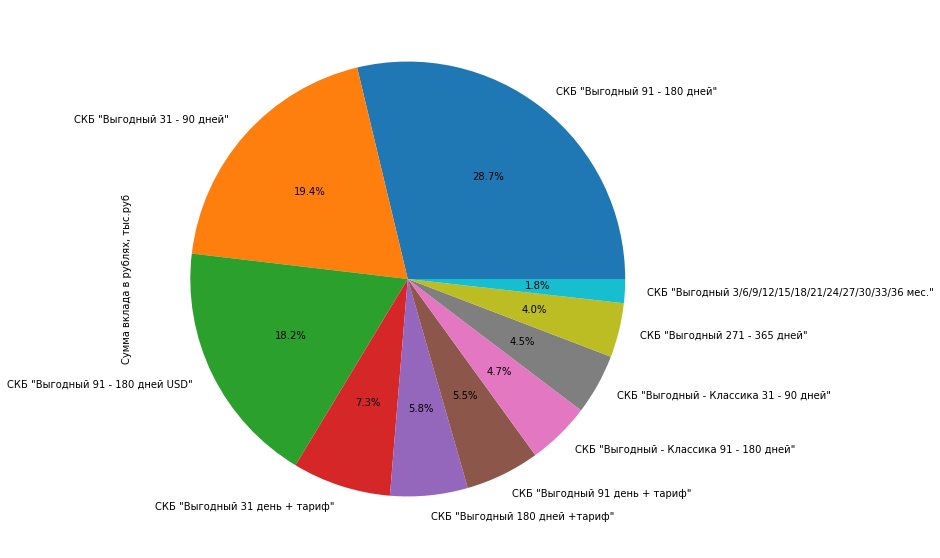

In [12]:
plt.rcParams['figure.figsize'] = [10, 10] 
df.plot(y='Сумма вклада в рублях, тыс.руб', kind='pie', autopct='%1.1f%%', legend=False)
plt.show()

In [13]:
data.groupby('Наименование вклада (Продукт)')['Количество дней'].mean().reset_index().sort_values('Количество дней', ascending=False).head(10)

,Наименование вклада (Продукт),Количество дней
25,"СКБ ""Выгодный на 1/2/3 года + тариф""",1093.000000
36,"СКБ ""Постоянный доход на 1/2/3 года""",848.900662
6,"СКБ ""Выгодный 12/24/36 мес.""",760.079787
0,"СКБ ""Всегда под рукой на 1/2 года (срочный) USD""",730.000000
39,"СКБ ""Постоянный доход+тариф 31-90""",705.976744
37,"СКБ ""Постоянный доход+тариф 181-270""",691.482759
26,"СКБ ""Выгодный на 1/2/3 года""",647.898734
50,"СКБ ""Проценты на проценты+тариф 181-270""",630.509434
49,"СКБ ""Проценты на проценты на 1/2/3 года""",621.863057
20,"СКБ ""Выгодный 6/12/18/24/30/36 мес."" 1095NEW",550.000000


In [14]:
data.groupby('Наименование вклада (Продукт)')['Ставка'].mean().reset_index().sort_values('Ставка').head(10)

,Наименование вклада (Продукт),Ставка
0,"СКБ ""Всегда под рукой на 1/2 года (срочный) USD""",0.005000
14,"СКБ ""Выгодный 31 - 90 дней USD""",0.016000
22,"СКБ ""Выгодный 91 - 180 дней USD""",0.017000
10,"СКБ ""Выгодный 271 - 365 дней USD""",0.017614
1,"СКБ ""Всегда под рукой на 1/2 года (срочный)""",0.057168
27,"СКБ ""Золотое время"" на 365 дней",0.061832
42,"СКБ ""Проценты на проценты - Классика 271 - 365...",0.066104
41,"СКБ ""Проценты на проценты - Классика 181 - 270...",0.066280
28,"СКБ ""Постоянный доход - Классика 181 - 270 дней""",0.066368
43,"СКБ ""Проценты на проценты - Классика 31 - 90 д...",0.066979


 - Вклад, который принес больше всего прибыли, по сравнению с другими - СКБ "Выгодный 91 - 180 дней" (853988.9 тыс.руб.)
 - В среднем больше всего приносит - СКБ "Выгодный 31 - 90 дней USD" (554.02 тыс.руб. каждый вклад)
 - Самый длительный вклад в среднем - СКБ "Выгодный на 1/2/3 года + тариф" - 1093 дня (~ 3 года)
 - Вклад с самой маленьной ставкой в среднем - СКБ "Всегда под рукой на 1/2 года (срочный) USD"	 (0,5%)